In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


num_sequences - the number of sequences processed (for the country, variant and date)

perc_sequences - percentage of sequences from the total number of sequences (for the country, variant and date)

numsequencestotal - total number of sequences (for the country, variant and date)

It's hard to understand the meaning of the variant "non_who" so I will ignore it.

In [16]:
#funciton to open the file and read the contents 
variant_df = pd.read_csv('~/Desktop/Tokyo_Electron_USA/covid-variants.csv')

#getting the first 20 values
variant_df.head(20)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


In [19]:
#Return a tuple representing the dimensionality of the DataFrame.
variant_df.shape

(100416, 6)

In [21]:
variant_df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [22]:
variant_df['date'].sort_values(ascending=False)

62276    2022-01-05
67997    2022-01-05
62265    2022-01-05
62264    2022-01-05
62263    2022-01-05
            ...    
81318    2020-05-11
81317    2020-05-11
81316    2020-05-11
81315    2020-05-11
99745    2020-05-11
Name: date, Length: 100416, dtype: object

In [23]:
# Counting the variants in different locations
variant_location_count = variant_df.groupby('location')['variant'].count().sort_values(ascending=False)
variant_location_count

location
France            1080
Belgium           1080
Mexico            1080
United States     1080
United Kingdom    1080
                  ... 
Montenegro         384
Monaco             360
Benin              336
Fiji               336
Brunei             240
Name: variant, Length: 121, dtype: int64

In [24]:
# countries with the highest infection rate
rank = variant_df[['location','num_sequences_total']]
rank = rank.groupby(['location']).aggregate({'num_sequences_total':'sum'}, inplace=True)
rank = rank.sort_values(by='num_sequences_total', ascending = False)
rank

,num_sequences_total
location,
United States,49960248
United Kingdom,37427568
Germany,7851432
Denmark,6728880
Canada,4365240
...,...
Belize,7536
Iraq,4008
Moldova,3648


In [25]:
# Finding out how the different Variants are being distributed.
variant_df.groupby('variant',sort=False).sum()

,num_sequences,perc_sequences,num_sequences_total
variant,,,
Alpha,1132595,59642.42,6316093
B.1.1.277,1183,590.49,6316093
B.1.1.302,486,258.21,6316093
B.1.1.519,22825,998.30,6316093
B.1.160,34019,5256.85,6316093
B.1.177,170457,11681.60,6316093
B.1.221,15377,2117.31,6316093
B.1.258,30787,7789.39,6316093
B.1.367,961,293.37,6316093


In [26]:
#Check for the distribution of the variant of the virus across different countries
virus_distribution = pd.pivot_table(variant_df,'num_sequences','location','variant',aggfunc='sum')
virus_distribution

variant,Alpha,B.1.1.277,B.1.1.302,B.1.1.519,B.1.160,B.1.177,B.1.221,B.1.258,B.1.367,B.1.620,...,Gamma,Iota,Kappa,Lambda,Mu,Omicron,S:677H.Robin1,S:677P.Pelican,non_who,others
location,,,,,,,,,,,,,,,,,,,,,
Angola,156,0,0,0,3,4,0,1,0,2,...,1,0,6,0,0,0,0,0,270,260
Argentina,366,0,0,46,0,0,0,1,0,0,...,2859,21,0,1109,26,93,0,0,2278,2231
Aruba,551,0,0,27,0,18,2,0,0,0,...,123,102,0,2,95,0,2,0,302,253
Australia,613,0,0,6,20,41,7,15,0,0,...,8,5,156,1,1,1693,2,2,15469,15376
Austria,3563,5,0,0,349,216,24,414,1,0,...,34,2,1,0,49,34,0,0,2047,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,239829,0,0,13136,73,282,20,87,0,26,...,28733,41720,333,1254,6041,28536,6449,4783,339081,314225
Uruguay,0,0,0,0,0,10,0,0,0,0,...,174,0,0,1,0,0,0,0,507,497
Vietnam,11,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,5


In [27]:
#Finding the top 3 countries with each of the variants 
unique_variant_types = variant_df['variant'].unique()
unique_variant_types 
for variant in unique_variant_types:
    print(f'Top 3 Countries with virus {variant} : \n {virus_distribution[variant].sort_values(ascending=False)[:3]}\n')

Top 3 Countries with virus Alpha : 
 location
United Kingdom    262781
United States     239829
Germany           104138
Name: Alpha, dtype: int64

Top 3 Countries with virus B.1.1.277 : 
 location
Denmark           545
Norway            242
United Kingdom    183
Name: B.1.1.277, dtype: int64

Top 3 Countries with virus B.1.1.302 : 
 location
Sweden     279
Denmark    121
Norway      37
Name: B.1.1.302, dtype: int64

Top 3 Countries with virus B.1.1.519 : 
 location
United States    13136
Mexico            7418
Canada            1393
Name: B.1.1.519, dtype: int64

Top 3 Countries with virus B.1.160 : 
 location
France         6054
Switzerland    5537
Denmark        5299
Name: B.1.160, dtype: int64

Top 3 Countries with virus B.1.177 : 
 location
United Kingdom    82149
Denmark           27379
Spain             10196
Name: B.1.177, dtype: int64

Top 3 Countries with virus B.1.221 : 
 location
Denmark        2958
Netherlands    2601
Germany        2370
Name: B.1.221, dtype: int64

Top 3 

Years in dataset [2020 2021 2022]


Text(0.5, 1.0, 'Spread of the Covid-19 virus across 2020,2021 and 2022')

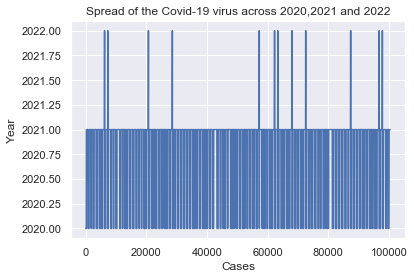

In [34]:
#Ploting a graph to observe the spread of the virus and variants across the past years 

# plot of Year vs Cases 
#0.25 - one-fourth of the year 
#0.5 - half of the year
#0.75 - three-fourth of the year 

variant_df['year'] = pd.DatetimeIndex(variant_df['date']).year
variant_df['month'] = pd.DatetimeIndex(variant_df['date']).month
variant_df['day'] = pd.DatetimeIndex(variant_df['date']).day

print('Years in dataset',np.unique(variant_df['year']))
sns.set()
variant_df['year'].plot()
plt.xlabel('Cases')
plt.ylabel('Year')
plt.title('Spread of the Covid-19 virus across 2020,2021 and 2022')


Text(0, 0.5, 'Number')

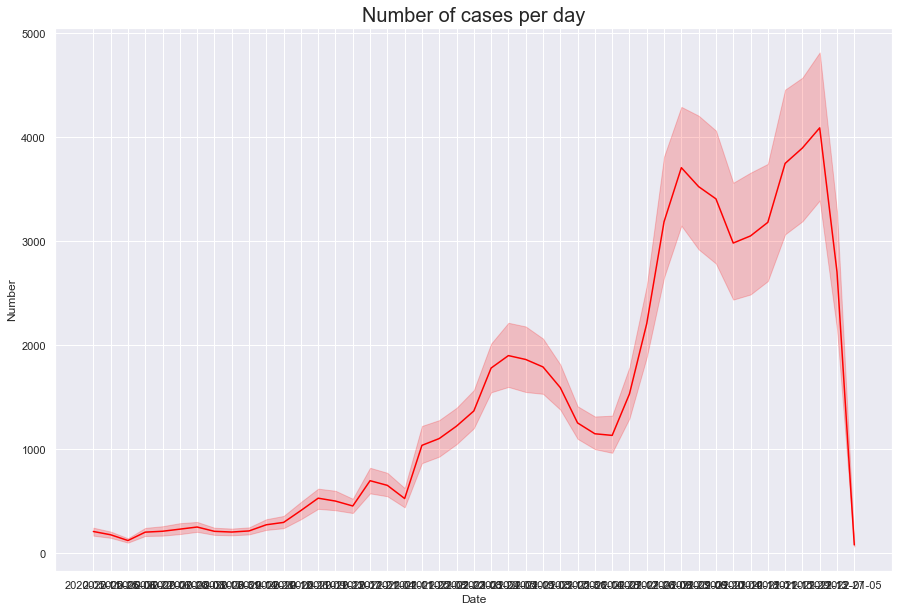

In [36]:
# the time series of omicron cases

plt.figure(figsize=(15,10))
sns.lineplot(data=variant_df, x='date', y='num_sequences_total',color='red')
plt.title('Number of cases per day', fontsize = 20)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Number', fontsize = 12)